In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as numpy
import pytesseract
from pytesseract import Output
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image


In [ ]:
#Extract archive
zip = zipfile.ZipFile ("/content/Dataset-2.zip", "r")
zip.extractall("tmp/")
zip.close()

In [ ]:
!pip install tensorflow

# Dataset and preprocessing pipeline

In [ ]:
folder_mappings = {
    '/content/tmp/Dataset-2': '/content/tmp/soil_type',
    '/content/tmp/soil_type/Train': '/content/tmp/soil_type/train',
    '/content/tmp/soil_type/test': '/content/tmp/soil_type/validation',
    '/content/tmp/soil_type/train/Alluvial soil': '/content/tmp/soil_type/train/alluvial',
    '/content/tmp/soil_type/train/Black Soil' : '/content/tmp/soil_type/train/black',
    '/content/tmp/soil_type/train/Clay soil' : '/content/tmp/soil_type/train/clay',
    '/content/tmp/soil_type/train/Red soil' : '/content/tmp/soil_type/train/red',
    '/content/tmp/soil_type/validation/Alluvial soil': '/content/tmp/soil_type/validation/alluvial',
    '/content/tmp/soil_type/validation/Black Soil' : '/content/tmp/soil_type/validation/black',
    '/content/tmp/soil_type/validation/Clay soil' : '/content/tmp/soil_type/validation/clay',
    '/content/tmp/soil_type/validation/Red soil' : '/content/tmp/soil_type/validation/red',
}


for old_folder_path, new_folder_path in folders.items():
  if os.path.exists(new_folder_path):
        shutil.rmtree(new_folder_path)  # Delete the destination folder if it already exists and is not empty
    os.rename(old_folder_path, new_folder_path)


NameError: name 'folders' is not defined

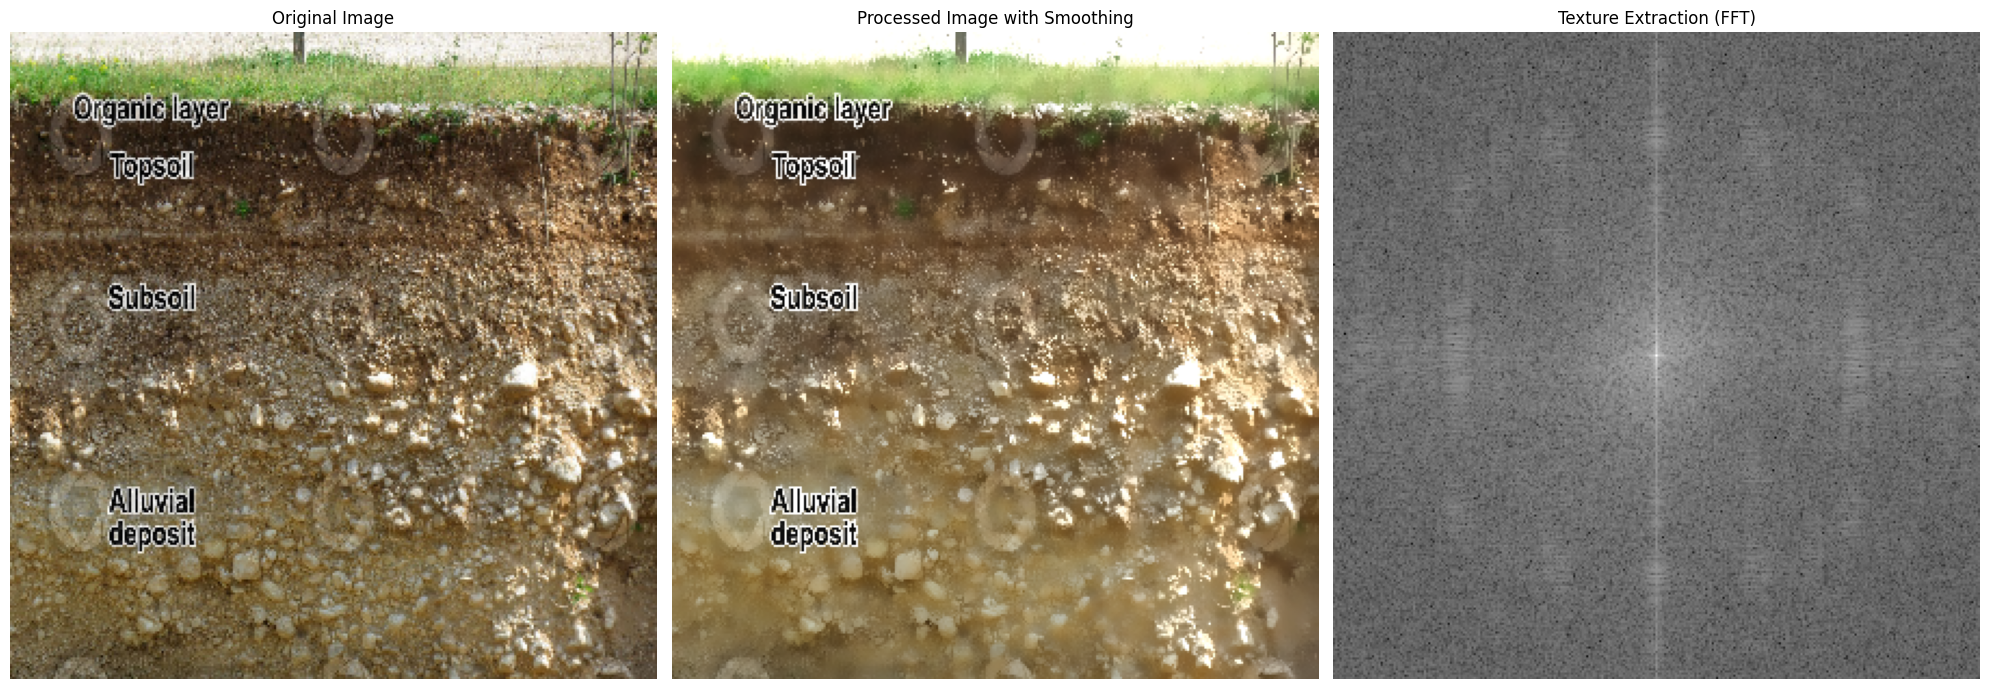

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Ruta de la imagen específica
file_path = r"/content/tmp/Dataset-2/test/Alluvial soil/Copy of 01060602previewen-02d.jpg"

# Función para ajustar brillo y contraste
def adjust_brightness_contrast(img, alpha=1.0, beta=0):
    """Ajustar brillo y contraste.
    alpha > 1 aumenta el contraste, alpha < 1 lo reduce.
    beta > 0 aumenta el brillo, beta < 0 lo disminuye.
    """
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

# Cargar la imagen original y convertir a array
img_original = image.load_img(file_path)
img_array = image.img_to_array(img_original)

# Redimensionar la imagen a 299x299
img_resized = cv2.resize(img_array, (299, 299))

# Usar un kernel de 3x3 en lugar de 5x5 para un suavizado más ligero
kernel = np.ones((3, 3), np.float32) / 9
img_smoothed = cv2.filter2D(img_resized, -1, kernel)
img_smoothed = cv2.bilateralFilter(img_resized, d=9, sigmaColor=75, sigmaSpace=75)

# Aplicar el ajuste de brillo y contraste
img_bright_contrast = adjust_brightness_contrast(img_smoothed, alpha=1.2, beta=0.5)

# Convertir la imagen a escala de grises para la transformación de Fourier
gray_image = cv2.cvtColor(img_bright_contrast, cv2.COLOR_BGR2GRAY)
f_transform = np.fft.fft2(gray_image)
f_shift = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)

plt.figure(figsize=(20, 8))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(image.array_to_img(img_resized / 255.0))
plt.title("Original Image")
plt.axis('off')

# Imagen procesada con suavizado y ajuste de brillo/contraste
plt.subplot(1, 3, 2)
plt.imshow(image.array_to_img(img_bright_contrast / 255.0))
plt.title("Processed Image with Smoothing")
plt.axis('off')

# Mostrar la transformación de Fourier
plt.subplot(1, 3, 3)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Texture Extraction (FFT)")
plt.axis('off')

plt.tight_layout()
plt.show()




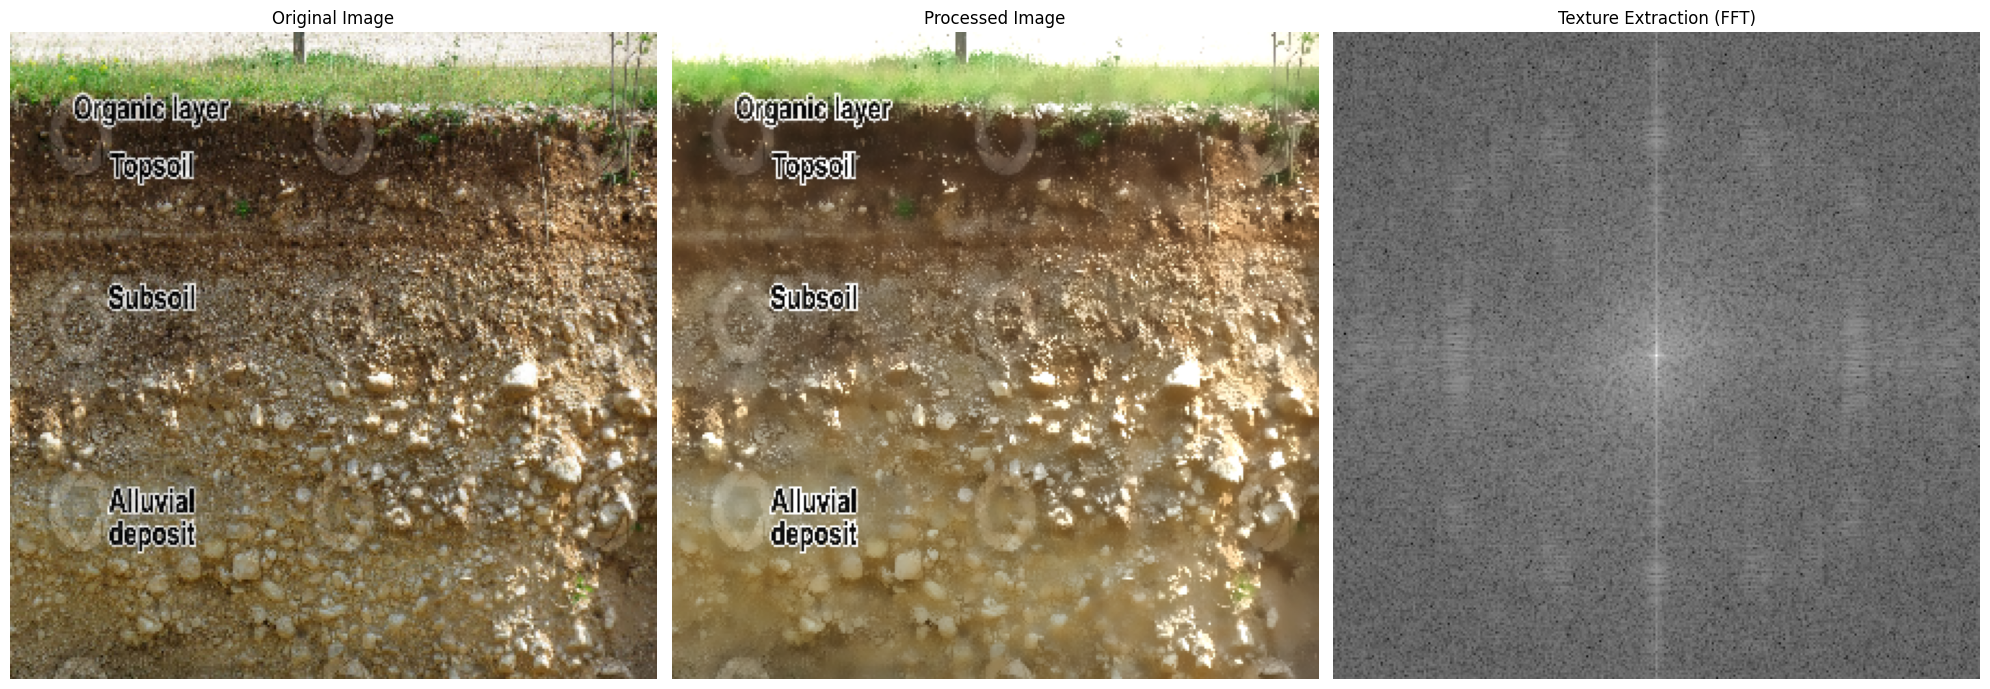

Gaussian Noise Variance: 13663.3722
PSNR: 20.92 dB


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Ruta de la imagen específica
file_path = r"/content/tmp/Dataset-2/test/Alluvial soil/Copy of 01060602previewen-02d.jpg"

# Función para ajustar brillo y contraste
def adjust_brightness_contrast(img, alpha=1.0, beta=0):
    """Ajustar brillo y contraste.
    alpha > 1 aumenta el contraste, alpha < 1 lo reduce.
    beta > 0 aumenta el brillo, beta < 0 lo disminuye.
    """
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

# Función para estimar ruido gaussiano
def estimate_gaussian_noise(image):
    """Calcula el ruido gaussiano como la varianza del ruido."""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) == 3 else image
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    noise = gray - blurred
    noise_variance = np.var(noise)
    return noise_variance

# Función para calcular PSNR
def calculate_psnr(original, processed):
    """Calcula la relación de señal a ruido pico (PSNR)."""
    assert original.shape == processed.shape, "Las imágenes deben tener las mismas dimensiones."
    mse = np.mean((original - processed) ** 2)
    if mse == 0:  # Si no hay diferencia, PSNR es infinito
        return float('inf')
    max_pixel_value = 255.0  # Valor máximo para imágenes de 8 bits
    psnr = 10 * np.log10((max_pixel_value ** 2) / mse)
    return psnr

# Cargar la imagen original y convertir a array
img_original = image.load_img(file_path)
img_array = image.img_to_array(img_original)

# Redimensionar la imagen a 299x299
img_resized = cv2.resize(img_array, (299, 299))

# Usar un kernel de 3x3 en lugar de 5x5 para un suavizado más ligero
kernel = np.ones((3, 3), np.float32) / 9
img_smoothed = cv2.filter2D(img_resized, -1, kernel)
img_smoothed = cv2.bilateralFilter(img_resized, d=9, sigmaColor=75, sigmaSpace=75)

# Aplicar el ajuste de brillo y contraste
img_bright_contrast = adjust_brightness_contrast(img_smoothed, alpha=1.2, beta=0.5)

# Convertir la imagen a escala de grises para la transformación de Fourier
gray_image = cv2.cvtColor(img_bright_contrast, cv2.COLOR_BGR2GRAY)
f_transform = np.fft.fft2(gray_image)
f_shift = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)

# Calcular ruido gaussiano y PSNR
noise_variance = estimate_gaussian_noise(img_bright_contrast)
psnr_value = calculate_psnr(img_resized, img_bright_contrast)

# Mostrar resultados
plt.figure(figsize=(20, 8))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(image.array_to_img(img_resized / 255.0))
plt.title("Original Image")
plt.axis('off')

# Imagen procesada con suavizado y ajuste de brillo/contraste
plt.subplot(1, 3, 2)
plt.imshow(image.array_to_img(img_bright_contrast / 255.0))
plt.title("Processed Image")
plt.axis('off')

# Mostrar la transformación de Fourier
plt.subplot(1, 3, 3)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Texture Extraction (FFT)")
plt.axis('off')

plt.tight_layout()
plt.show()

# Imprimir métricas
print(f"Gaussian Noise Variance: {noise_variance:.4f}")
print(f"PSNR: {psnr_value:.2f} dB")


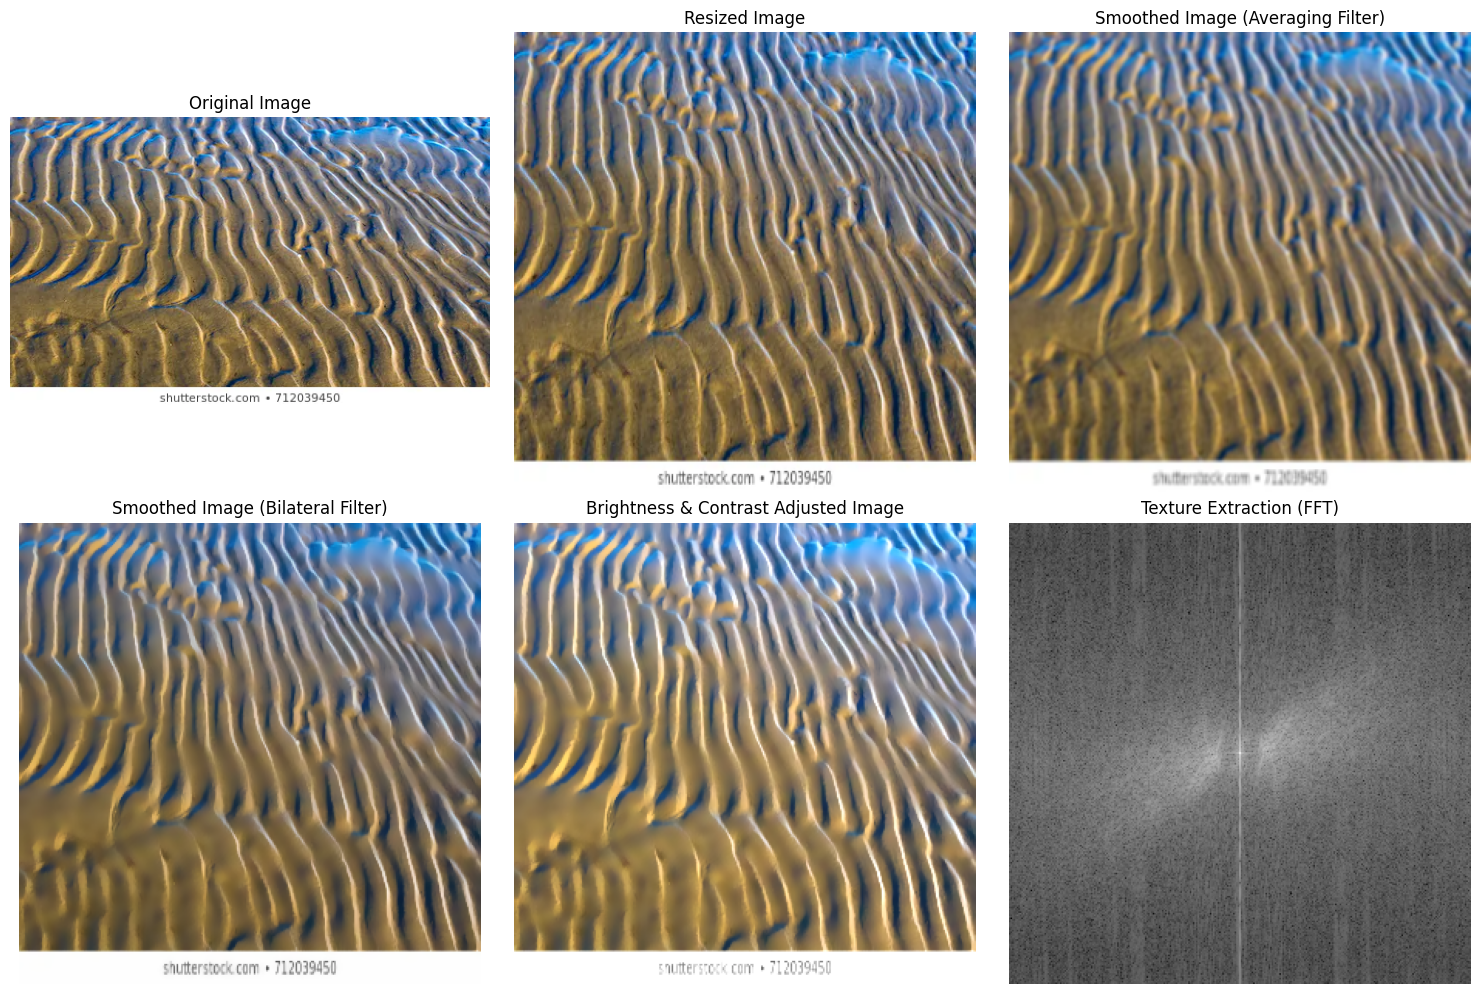

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Ruta de la imagen específica
file_path = r"/content/tmp/Dataset-2/test/Alluvial soil/Alluvial_48.jpg"

# Función para ajustar brillo y contraste
def adjust_brightness_contrast(img, alpha=1.0, beta=0):
    """Ajustar brillo y contraste.
    alpha > 1 aumenta el contraste, alpha < 1 lo reduce.
    beta > 0 aumenta el brillo, beta < 0 lo disminuye.
    """
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

# Cargar la imagen original y convertir a array
img_original = image.load_img(file_path)
img_array = image.img_to_array(img_original)

# Almacenar cada paso en una lista
preprocessing_steps = []

# Paso 1: Imagen original
preprocessing_steps.append(("Original Image", img_array))

# Paso 2: Redimensionar la imagen a 299x299
img_resized = cv2.resize(img_array, (299, 299))
preprocessing_steps.append(("Resized Image", img_resized))

# Paso 3: Aplicar suavizado (filtro promedio y bilateral)
kernel = np.ones((3, 3), np.float32) / 9
img_smoothed_avg = cv2.filter2D(img_resized, -1, kernel)
preprocessing_steps.append(("Smoothed Image (Averaging Filter)", img_smoothed_avg))

img_smoothed_bilateral = cv2.bilateralFilter(img_resized, d=9, sigmaColor=75, sigmaSpace=75)
preprocessing_steps.append(("Smoothed Image (Bilateral Filter)", img_smoothed_bilateral))

# Paso 4: Aplicar ajuste de brillo y contraste
img_bright_contrast = adjust_brightness_contrast(img_smoothed_bilateral, alpha=1.2, beta=0.5)
preprocessing_steps.append(("Brightness & Contrast Adjusted Image", img_bright_contrast))

# Paso 5: Transformación de Fourier para análisis de textura
gray_image = cv2.cvtColor(img_bright_contrast, cv2.COLOR_BGR2GRAY)
f_transform = np.fft.fft2(gray_image)
f_shift = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)
preprocessing_steps.append(("Texture Extraction (FFT)", magnitude_spectrum))

# Mostrar cada paso
plt.figure(figsize=(15, 10))
for i, (title, step_image) in enumerate(preprocessing_steps):
    plt.subplot(2, 3, i + 1)
    if len(step_image.shape) == 2:  # Grayscale image (e.g., FFT)
        plt.imshow(step_image, cmap='gray')
    else:  # RGB image
        plt.imshow(image.array_to_img(step_image / 255.0))
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# import required libraries
import cv2
import numpy as np

# read input image
file_path = r"C:\Users\jedrz\soil project\Dataset\test\Clay soil\Clay_6.jpg"
img = cv2.imread(file_path)

# Convert BGR to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_yellow = np.array([101, 57, 0])
upper_yellow = np.array([205, 200, 100])

# Create a mask. Threshold the HSV image to get only yellow colors
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Bitwise-AND mask and original image
result = cv2.bitwise_and(img,img, mask= mask)

# display the mask and masked image
cv2.imshow('Mask',mask)
cv2.waitKey(0)
cv2.imshow('Masked Image',result)
cv2.waitKey(0)
cv2.destroyAllWindows()